In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import my_zodiac_library as mzl

# 3. DataMining & EDA

## Первичный обзор данных

In [2]:
name = 'data/total_cart_table(66)'
df = pd.read_csv(name, sep='\t')

In [3]:
df = mzl.purification_df(mzl.preprocessing_df(df))
mzl.check_df(df)
df.head(2)

OK


,rank,name,favors,folders,awards,oscar,nom_oscar,rating,writer,producer,...,career_start,caree_finish,date,death_date,zodiac,element,prof,country,region,glob_region
0,1,Михаил Ефремов,695,4712,False,0.0,0.0,6.08,1.0,0.0,...,1976.0,2020.0,19631110,0,Scorpio,water,actr,russia,RF,CIS
1,2,Гай Ричи,5358,39893,True,0.0,0.0,7.68,13.0,7.0,...,1995.0,2021.0,19680910,0,Virgo,earth,drct,gb,GB+CAN,CoN


In [4]:
df.describe()

,rank,favors,folders,oscar,nom_oscar,rating,writer,producer,director,editor,actor,male,height,year,total_films,career_start,caree_finish,date,death_date
count,4524.000000,4524.000000,4524.000000,4524.000000,4524.000000,4517.000000,4524.000000,4524.000000,4524.000000,4524.000000,4524.000000,4524.000000,3807.000000,4524.000000,4524.000000,3545.000000,3543.000000,4.524000e+03,4.524000e+03
mean,2432.650309,575.334660,3368.300840,0.109416,0.050619,6.794853,3.343280,3.599248,3.302829,0.259726,49.165782,0.589302,1.750268,1969.435455,88.684792,1988.711989,2018.124189,1.969501e+07,1.828929e+06
std,1438.403293,1658.055785,7784.870128,0.449246,0.515814,0.547808,20.911709,15.290976,9.717990,1.964184,42.738379,0.492015,0.096630,20.946581,88.674884,17.973558,6.637236,2.094598e+05,5.763849e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,2.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.070000,1564.000000,2.000000,1898.000000,1942.000000,1.564042e+07,0.000000e+00
25%,1172.750000,55.000000,419.750000,0.000000,0.000000,6.510000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,1.680000,1960.000000,34.000000,1979.000000,2019.000000,1.960070e+07,0.000000e+00
50%,2401.500000,142.000000,1070.500000,0.000000,0.000000,6.850000,0.000000,0.000000,0.000000,0.000000,40.000000,1.000000,1.750000,1973.000000,64.500000,1992.000000,2020.000000,1.973110e+07,0.000000e+00
75%,3673.250000,396.500000,2740.000000,0.000000,0.000000,7.130000,1.000000,3.000000,1.000000,0.000000,68.000000,1.000000,1.820000,1984.000000,116.000000,2002.000000,2020.000000,1.984072e+07,0.000000e+00
max,5001.000000,38557.000000,134462.000000,8.000000,26.000000,8.460000,1173.000000,662.000000,142.000000,62.000000,499.000000,1.000000,2.130000,2010.000000,1213.000000,2020.000000,2027.000000,2.010052e+07,2.020060e+07


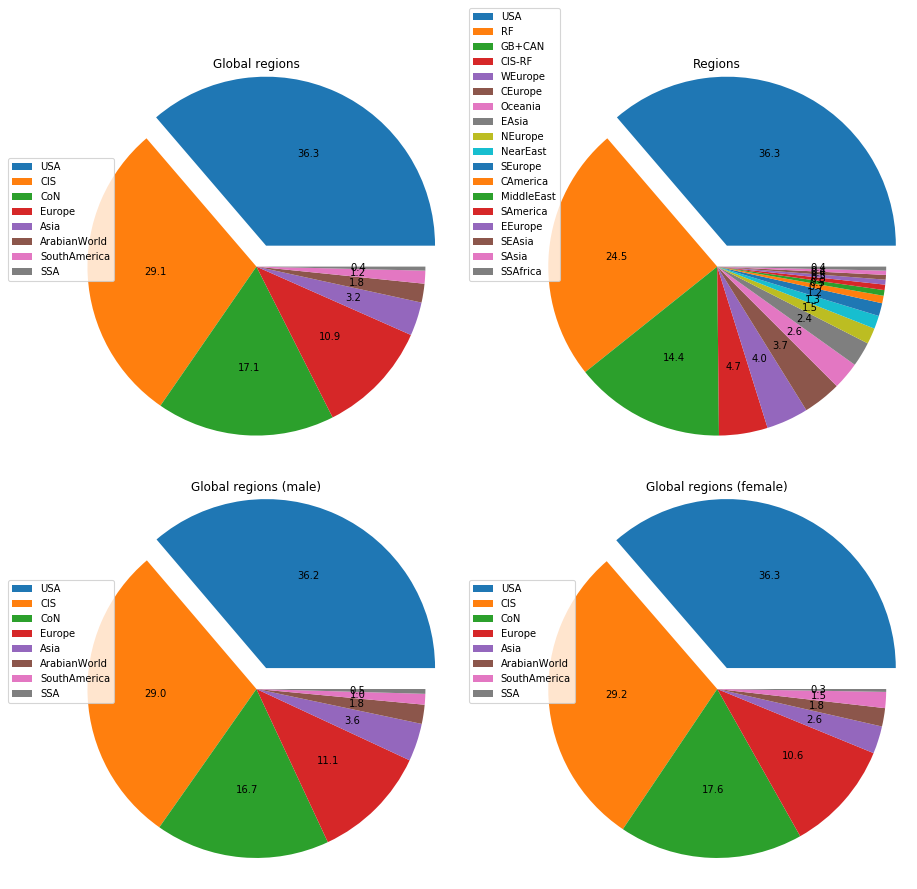

In [5]:
data_names = [df.glob_region.value_counts().index, df.region.value_counts().index, \
              df[df.male==1].glob_region.value_counts().index, df[df.male==0].glob_region.value_counts().index]
data_values = [df.glob_region.value_counts().values, df.region.value_counts().values, \
               df[df.male==1].glob_region.value_counts().values, df[df.male==0].glob_region.value_counts().values]
pies_names = ['Global regions', 'Regions', \
              'Global regions (male)', 'Global regions (female)']
mzl.draw_pies(data_names, data_values, pies_names=pies_names)

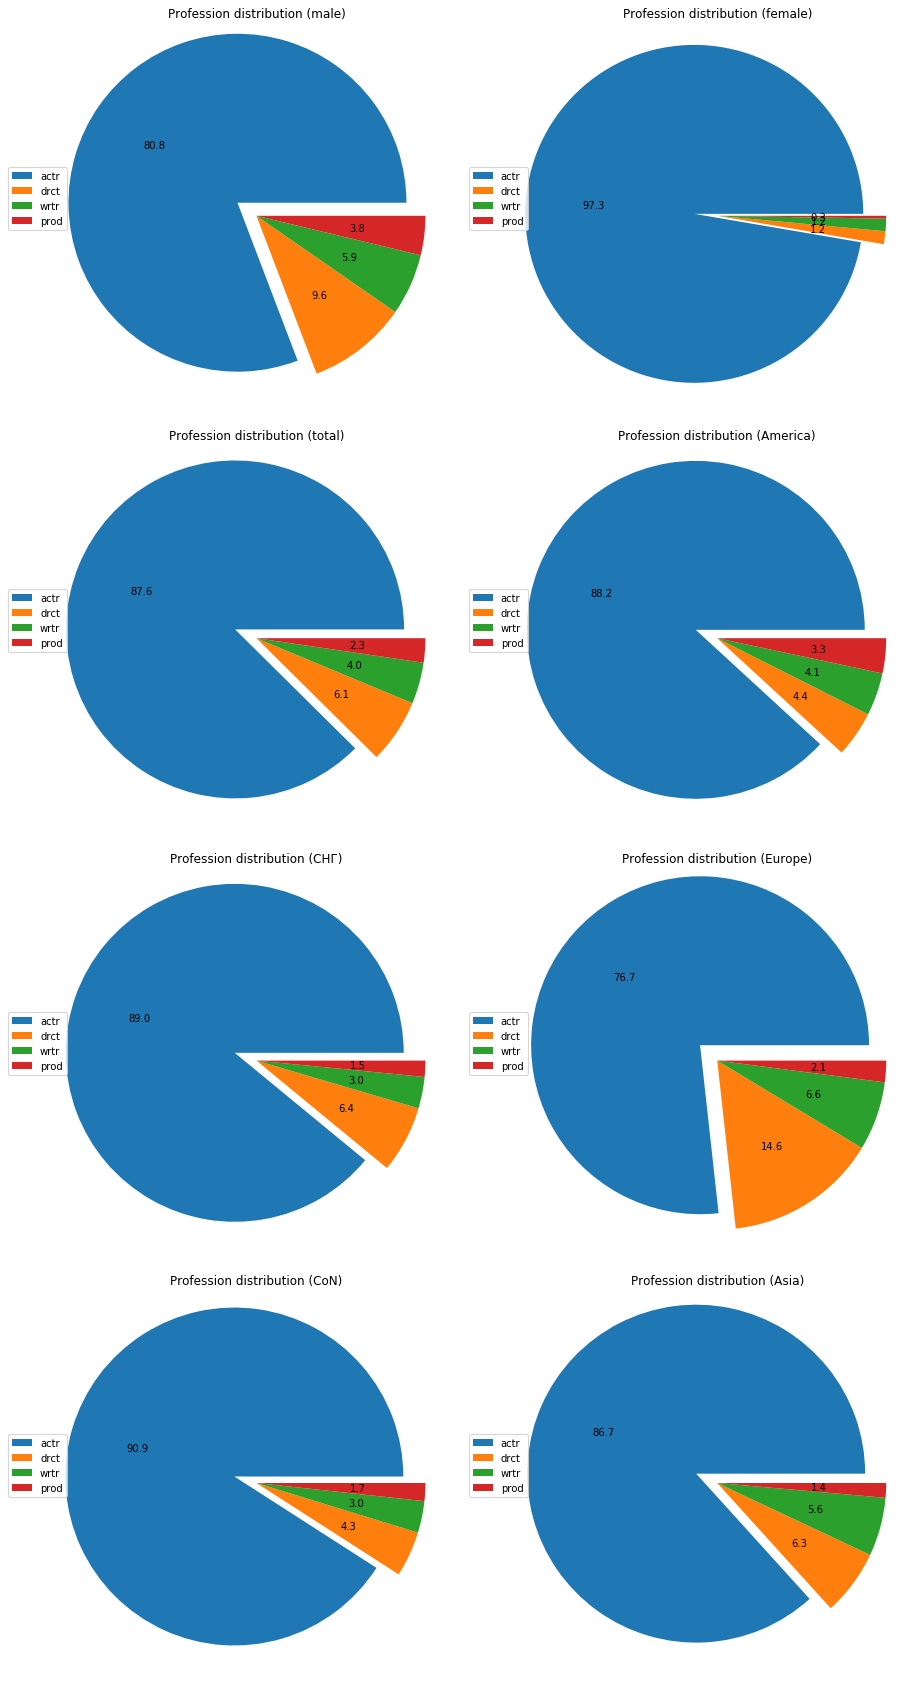

In [6]:
pies = ['male', 'female', 'total', 'America', 'СНГ', 'Europe', 'CoN', 'Asia']
pies_names = []
for p in pies:
    pies_names.append('Profession distribution ({})'.format(p))
data_values = [df[df.male == 1].prof.value_counts().values, df[df.male == 0].prof.value_counts().values, \
 df.prof.value_counts().values, df[df.glob_region == 'USA'].prof.value_counts().values, \
 df[df.glob_region=='CIS'].prof.value_counts().values, df[df.glob_region=='Europe'].prof.value_counts().values, \
 df[df.glob_region=='CoN'].prof.value_counts().values, df[df.glob_region=='Asia'].prof.value_counts().values]
data_names = [df[df.male == 1].prof.value_counts().index, df[df.male == 0].prof.value_counts().index, \
 df.prof.value_counts().index, df[df.glob_region == 'USA'].prof.value_counts().index, \
 df[df.glob_region=='CIS'].prof.value_counts().index, df[df.glob_region=='Europe'].prof.value_counts().index, \
 df[df.glob_region=='CoN'].prof.value_counts().index, df[df.glob_region=='Asia'].prof.value_counts().index]

mzl.draw_pies(data_names, data_values, pies_names=pies_names)

## Рост

Единственная величина, которую очень просто интерпретировать - рост (а так же даты рождения). Поэтому я тут ее немного поизучаю. Для разогрева начнем с нее.

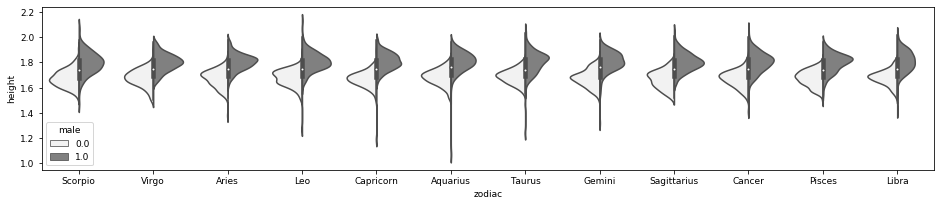

In [7]:
fig = plt.figure(figsize= (16,3))
sns.violinplot(y="height", x="zodiac", hue = 'male', split = True, data=df, color='grey')

На мой взгляд ничего интересного.

In [8]:
print('Средний рост (мужчины):', df.groupby(by=['male'])['height'].mean()[1]),
print('Средний рост (женщины):', df.groupby(by=['male'])['height'].mean()[0]),
print('Средний год рождения в базе:', df.year.mean())

Средний рост (мужчины): 1.8044242148384246
Средний рост (женщины): 1.6763664596273347
Средний год рождения в базе: 1969.4354553492485


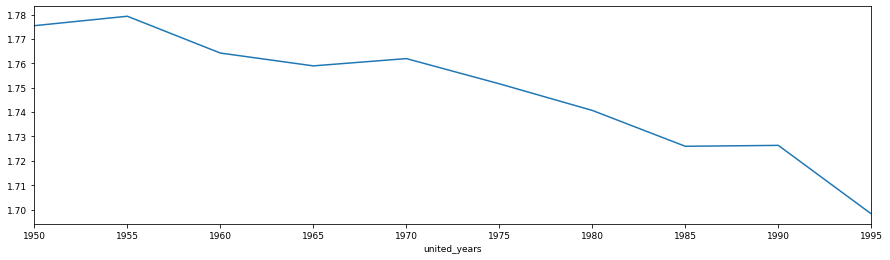

In [9]:
fig = plt.figure(figsize= (15,4))
temp_df = df
temp_df['united_years'] = temp_df['year'].map(lambda x: (x - x%5))
temp_df = temp_df[(df.prof == 'actr')][['united_years', 'height', 'male']].dropna()
# temp_df = temp_df[temp_df.male == 1]
temp_df = temp_df[temp_df.united_years >= 1950]
temp_df = temp_df[temp_df.united_years <= 1995]
temp_df.groupby(by=['united_years'])['height'].mean().plot.line() 

Средний рост актров стабильно снижается. Возможно, дело в том, что возростает относительное число женщин в кинематографе?

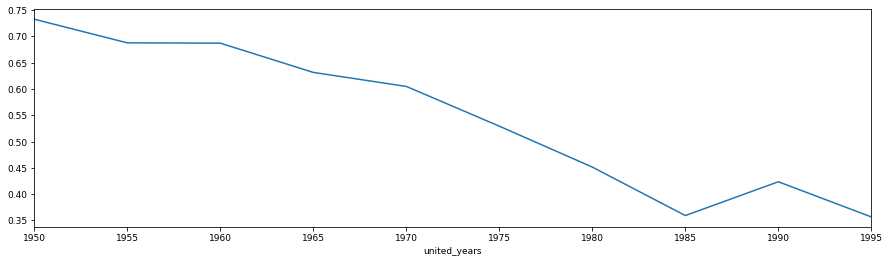

In [10]:
fig = plt.figure(figsize= (15,4))
temp_df = df
temp_df['united_years'] = temp_df['year'].map(lambda x: (x - x%5))
temp_df = temp_df[df.prof == 'actr'][['united_years', 'height', 'male']].dropna()
# temp_df = temp_df[temp_df.male == 1]
temp_df = temp_df[temp_df.united_years >= 1950]
temp_df = temp_df[temp_df.united_years <= 1995]
temp_df.groupby(by=['united_years'])['male'].mean().plot.line() 

Так и есть. Если в 50-x на одну женщину приходилось три мужчины в кинематографе, то в 90-е на двух мужчин приходится три женщины. А каков график среднего роста актера по каждому полу по отдельности?

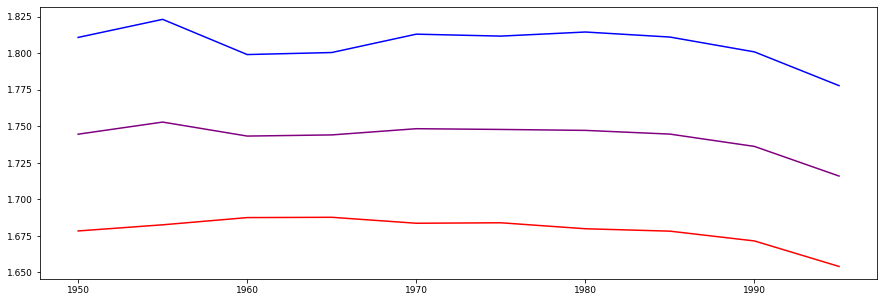

In [11]:
fig = plt.figure(figsize= (15,5))

temp_df = df
temp_df['united_years'] = temp_df['year'].map(lambda x: (x - x%5))
temp_df = temp_df[df.prof == 'actr'][['united_years', 'height', 'male']].dropna()
temp_df = temp_df[temp_df.united_years >= 1950]
temp_df = temp_df[temp_df.united_years <= 1995]

x_male = temp_df[df.male == 1].groupby(by=['united_years'])['united_years'].mean()
y_male = temp_df[df.male == 1].groupby(by=['united_years'])['height'].mean()
plt.plot(x_male, y_male, 'b') # plotting t, b separately 

x_female = temp_df[(df.male == 0) & (df.prof == 'actr')].groupby(by=['united_years'])['united_years'].mean()
y_female = temp_df[(df.male == 0) & (df.prof == 'actr')].groupby(by=['united_years'])['height'].mean()
plt.plot(x_female, y_female, 'r') # plotting t, c separately 

x = temp_df.groupby(by=['united_years'])['united_years'].mean()
# y = temp_df.groupby(by=['united_years'])['height'].mean()
y = (y_male + y_female) / 2
plt.plot(x, y, 'purple') # plotting t, a separately 

plt.show()

Более-менее точно можно сказать лишь о том, что средний рост голливудских (преимущественно) актеров не увеличивался в последнии 50 лет прошлого века.

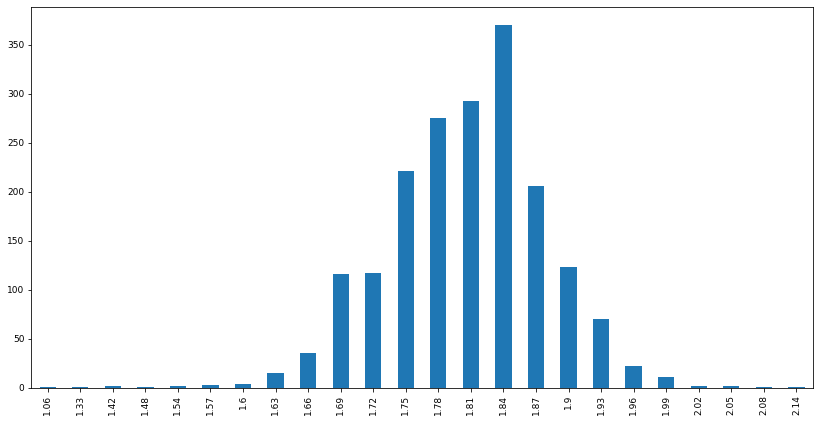

In [12]:
fig = plt.figure(figsize= (14,7))
# plt.legend(labels=['Men', 'Women'])
temp_df = df[(df['male']==1) & (df.prof == 'actr')]
temp_df['united_hght'] = temp_df['height'].map(lambda x: ((x*100) - (x*100)%3 +1) / 100)
temp_df['united_hght'].value_counts().sort_index().plot.bar()

Распределение роста актеров мужчин за все время.

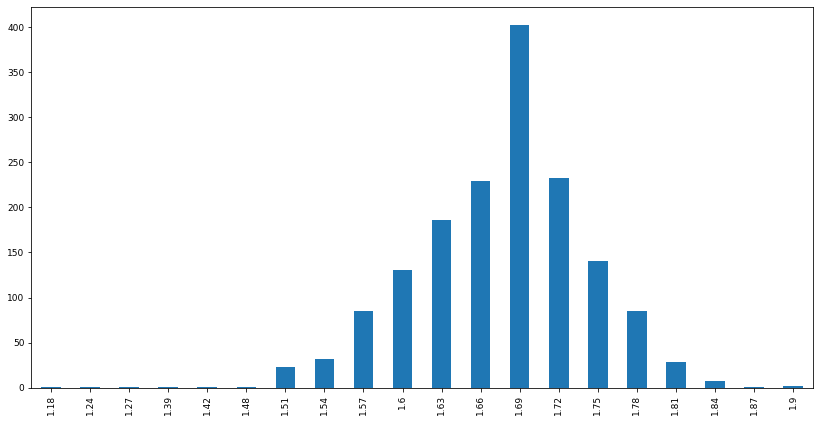

In [13]:
fig = plt.figure(figsize= (14,7))
temp_df = df[(df['male']==0) & (df.prof == 'actr')]
temp_df['join_hght'] = temp_df['height'].map(lambda x: ((x*100) - (x*100)%3 +1) / 100)
temp_df['join_hght'].value_counts().sort_index().plot.bar()

Распределение роста актеров женщин за все время.

## Общее число знаков зодиака в кинематографе

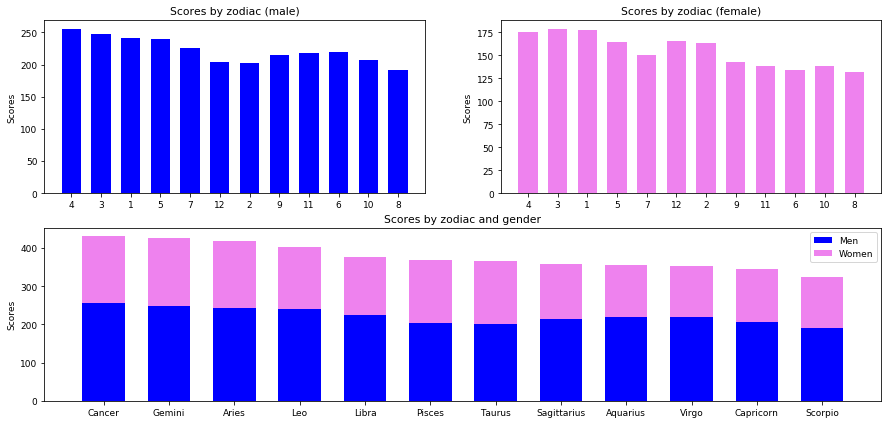

In [50]:
lft_tmp = df[df['male'] == 0]['zodiac'].value_counts()
rgt_tmp = df[df['male'] == 1]['zodiac'].value_counts()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df['zodiac'].value_counts()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('zodiac', ascending=False)

temp_df['zod_code'] = temp_df.index.map(lambda x: int(mzl.zod_code[x]))
temp_df = temp_df.rename(columns={"zodiac": "score"})
temp_df.to_csv('stats/scores_zod.csv')

fig = plt.figure(figsize= (15,7))
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222) 
ax3 = fig.add_subplot(212)
width = 0.65

ind = list(map(mzl.zod_code.get, temp_df.index))
means = temp_df['zodiac_y'].values
ax1.bar(ind, means, width, color='b')
ax1.set_ylabel('Scores')
ax1.set_title('Scores by zodiac (male)')

ind = list(map(mzl.zod_code.get, temp_df.index))
means = temp_df['zodiac_x'].values
ax2.bar(ind, means, width, color='violet')
ax2.set_ylabel('Scores')
ax2.set_title('Scores by zodiac (female)')

ind = temp_df['score'].index
menMeans = temp_df['zodiac_y'].values
womMeans = temp_df['zodiac_x'].values
ax3.bar(ind, menMeans, width, color='b')
ax3.bar(ind, womMeans, width, bottom=menMeans, color='violet')
ax3.set_ylabel('Scores')
ax3.set_title('Scores by zodiac and gender')
# ax3.set_yticks(np.arange(0, 180, 20))
ax3.legend(labels=['Men', 'Women'])

plt.show()

Так как количество наблюдений о каждом знаке задиака для каких-то групп для анализа бывает очень мало, я решил объединять зодиаки в группы знаков зодиака, чтобы хоть как-то скомпенсировать малое количество наблюдений. Объединять в группы я решил по признаку принадлежности зодиака к какой-то стихии. Можно было разделить зодиаки и на другие группы (фиксированнный-мутабельный-кардинальный знак или что-нибудь еще) Но я выбрал стихии, т.к. их сравнительно проще интерпретировать.

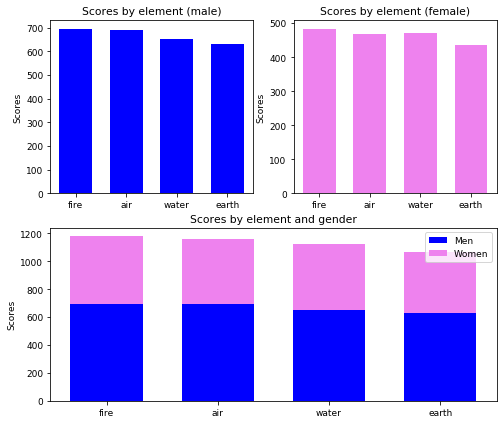

In [49]:
lft_tmp = df[df['male'] == 0]['element'].value_counts()
rgt_tmp = df[df['male'] == 1]['element'].value_counts()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df['element'].value_counts()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('element', ascending=False)


temp_df = temp_df.rename(columns={"element": "score"})
temp_df.to_csv('stats/scores_elm.csv')

fig = plt.figure(figsize= (8,7))
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222) 
ax3 = fig.add_subplot(212)
width = 0.65

ind = temp_df['score'].index
means = temp_df['element_y'].values
ax1.bar(ind, means, width, color='b')
ax1.set_ylabel('Scores')
ax1.set_title('Scores by element (male)')

ind = temp_df['score'].index
means = temp_df['element_x'].values
ax2.bar(ind, means, width, color='violet')
ax2.set_ylabel('Scores')
ax2.set_title('Scores by element (female)')

ind = temp_df['score'].index
menMeans = temp_df['element_y'].values
womMeans = temp_df['element_x'].values
ax3.bar(ind, menMeans, width, color='b')
ax3.bar(ind, womMeans, width, bottom=menMeans, color='violet')
ax3.set_ylabel('Scores')
ax3.set_title('Scores by element and gender')
# ax3.set_yticks(np.arange(0, 180, 20))
ax3.legend(labels=['Men', 'Women'])

plt.show()

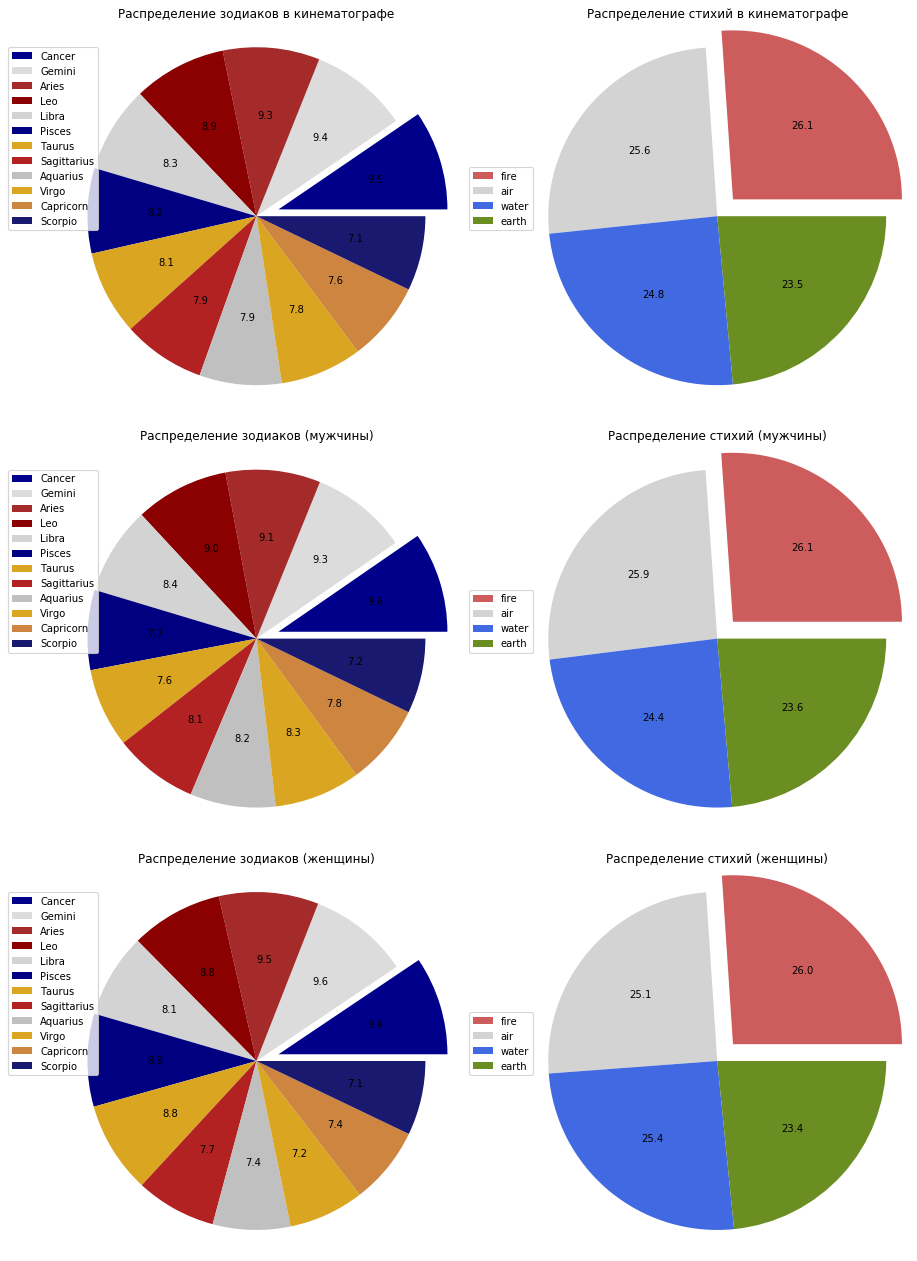

In [16]:
lft_tmp = df[df['male'] == 0]['zodiac'].value_counts()
rgt_tmp = df[df['male'] == 1]['zodiac'].value_counts()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True, suffixes=('_f','_m'))
rgt_tmp = df['zodiac'].value_counts()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('zodiac', ascending=False)

lft_tmp = df[df['male'] == 0]['element'].value_counts()
rgt_tmp = df[df['male'] == 1]['element'].value_counts()
temp_df_2 = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True, suffixes=('_f','_m'))
rgt_tmp = df['element'].value_counts()
temp_df_2 = pd.merge(temp_df_2,rgt_tmp, left_index=True, right_index=True)
temp_df_2 = temp_df_2.sort_values('element', ascending=False)

data_names = [temp_df.index, temp_df_2.index, temp_df.index, temp_df_2.index, temp_df.index, temp_df_2.index]
data_values = [temp_df.zodiac, temp_df_2.element, \
              temp_df.zodiac_m, temp_df_2.element_m, \
              temp_df.zodiac_f, temp_df_2.element_f]
pie_name = ['Распределение зодиаков в кинематографе', 'Распределение стихий в кинематографе', \
           'Распределение зодиаков (мужчины)', 'Распределение стихий (мужчины)', \
           'Распределение зодиаков (женщины)', 'Распределение стихий (женщины)']
data_color = [list(map(mzl.zod_color.get, temp_df.index)), list(map(mzl.elem_color.get, temp_df_2.index)), \
             list(map(mzl.zod_color.get, temp_df.index)), list(map(mzl.elem_color.get, temp_df_2.index)), \
             list(map(mzl.zod_color.get, temp_df.index)), list(map(mzl.elem_color.get, temp_df_2.index))]
mzl.draw_pies(data_names, data_values, data_color=data_color, pies_names=pie_name)

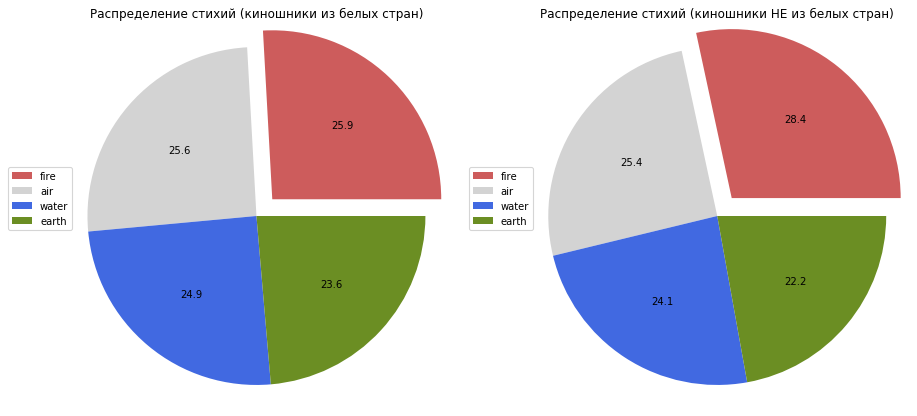

In [17]:
lft_tmp = df[(df['glob_region'] != 'USA') & (df['glob_region'] != 'CIS') & (df['glob_region'] != 'CoN') &\
            (df['glob_region'] != 'Europe')]['element'].value_counts()
rgt_tmp = df[(df['glob_region'] == 'USA') | (df['glob_region'] == 'CIS') | (df['glob_region'] == 'CoN') |\
            (df['glob_region'] == 'Europe')]['element'].value_counts()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df['element'].value_counts()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('element', ascending=False)

data_names = [temp_df.index, temp_df.index]
data_values = [temp_df.element_y, temp_df.element_x]
pie_name = ['Распределение стихий (киношники из белых стран)', \
            'Распределение стихий (киношники НЕ из белых стран)']
data_color = [list(map(mzl.elem_color.get, temp_df.index)), list(map(mzl.elem_color.get, temp_df.index))]
mzl.draw_pies(data_names, data_values, data_color=data_color, pies_names=pie_name)

#### Выводы и замечания:
1. Скорпионы и козероги реже идут самореализовываться в кино.
2. Огненые знаки а так же раки и близнецы - чаще.
3. Но все находятся очень близко. Необходимо проверить эти гипотезы точнее.
4. В последних двух пирогах я ожидал увидить, что в люди из белых стран более подвержены стереотипам о гороскопе, т.к. ближневосточный гороскоп распространен преимущественно на этой територии. Но я получил противоположенный результат. Возможно, либо потому что люди из не белых стран наоборот более склонны верить всему, либо потому что данных об актерах не из белых стран ОЧЕНЬ мало (~370 наблюдений) - более убедительное объяснение.
5. В общем и целом, в кино все идут более-менее равномерно. Так как кино все амплуа важны: и ботаника-девы, и мачо-овна. Плюс в данных присутствуют не только актерские, но и чисто технические профессии (монтажера, например). 

## Популярность знаков зодиака

Анализируется количество сердечек (кол-во пользователей сайта, которые добавили актера в "Избранное"). Эта часть анализа очень неустойчива к выбросам. 2-3 мегапопулярных актера могут "заработать репутацию" для всего знака зодиака. Все графики в этом блоке НИКАК не коррелируют с графиками в предыдущем блоке. Все блоки, графики в блоках и выводы в блоках независимы друг от друга*.

\*Пункт "Добавление в закладки" и этот пункт все-таки зависят друг от друга. Единственное исключение.

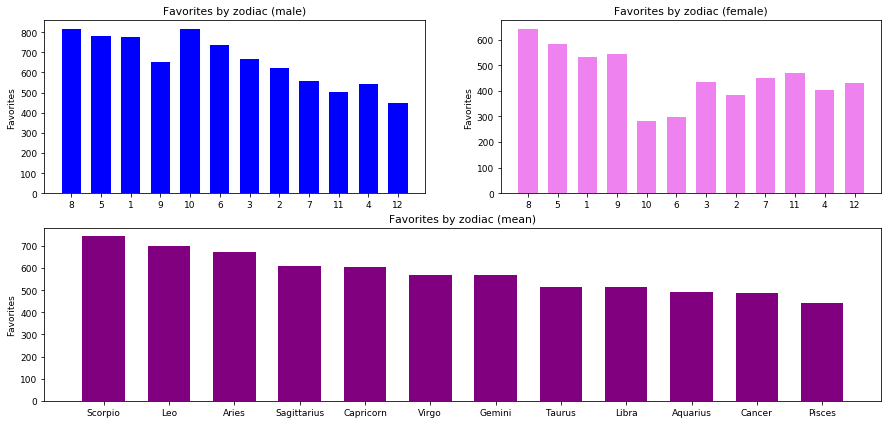

In [18]:
lft_tmp = df[df['male'] == 0].groupby(by=['zodiac'])['favors'].mean()
rgt_tmp = df[df['male'] == 1].groupby(by=['zodiac'])['favors'].mean()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df.groupby(by=['zodiac'])['favors'].mean()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('favors', ascending=False)

fig = plt.figure(figsize= (15,7))
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222) 
ax3 = fig.add_subplot(212)
width = 0.65

ind = list(map(mzl.zod_code.get, temp_df.index))
means = temp_df['favors_y'].values
ax1.bar(ind, means, width, color='b')
ax1.set_ylabel('Favorites')
ax1.set_title('Favorites by zodiac (male)')

ind = list(map(mzl.zod_code.get, temp_df.index))
means = temp_df['favors_x'].values
ax2.bar(ind, means, width, color='violet')
ax2.set_ylabel('Favorites')
ax2.set_title('Favorites by zodiac (female)')

ind = temp_df['favors'].index
means = temp_df['favors'].values
ax3.bar(ind, means, width, color='purple')
ax3.set_ylabel('Favorites')
ax3.set_title('Favorites by zodiac (mean)')

plt.show()

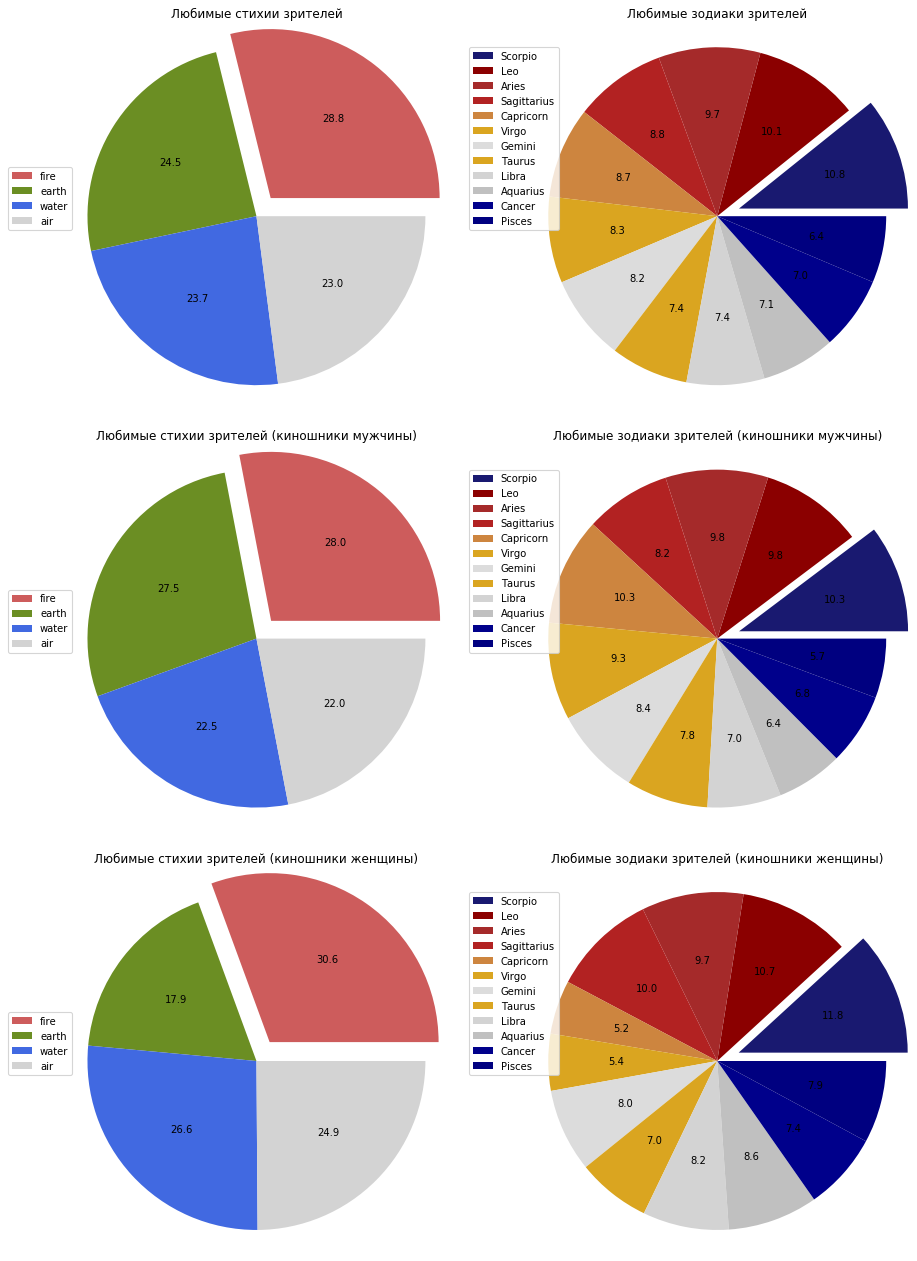

In [19]:
lft_tmp = df[df['male'] == 0].groupby(by=['element'])['favors'].mean()
rgt_tmp = df[df['male'] == 1].groupby(by=['element'])['favors'].mean()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True, suffixes=('_f', '_m'))
rgt_tmp = df.groupby(by=['element'])['favors'].mean()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('favors', ascending=False)

lft_tmp = df[df['male'] == 0].groupby(by=['zodiac'])['favors'].mean()
rgt_tmp = df[df['male'] == 1].groupby(by=['zodiac'])['favors'].mean()
temp_df_2 = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True, suffixes=('_f', '_m'))
rgt_tmp = df.groupby(by=['zodiac'])['favors'].mean()
temp_df_2 = pd.merge(temp_df_2,rgt_tmp, left_index=True, right_index=True)
temp_df_2 = temp_df_2.sort_values('favors', ascending=False)

data_names = [temp_df.index, temp_df_2.index, \
              temp_df.index, temp_df_2.index, \
              temp_df.index, temp_df_2.index]
data_values = [temp_df.favors, temp_df_2.favors, \
               temp_df.favors_m, temp_df_2.favors_m, \
               temp_df.favors_f, temp_df_2.favors_f]
pie_name = ['Любимые стихии зрителей', 'Любимые зодиаки зрителей', \
            'Любимые стихии зрителей (киношники мужчины)', 'Любимые зодиаки зрителей (киношники мужчины)',\
            'Любимые стихии зрителей (киношники женщины)', 'Любимые зодиаки зрителей (киношники женщины)']
data_color = [list(map(mzl.elem_color.get, temp_df.index)), list(map(mzl.zod_color.get, temp_df_2.index)), \
             list(map(mzl.elem_color.get, temp_df.index)), list(map(mzl.zod_color.get, temp_df_2.index)), \
             list(map(mzl.elem_color.get, temp_df.index)), list(map(mzl.zod_color.get, temp_df_2.index))]
mzl.draw_pies(data_names, data_values, data_color=data_color, pies_names=pie_name)

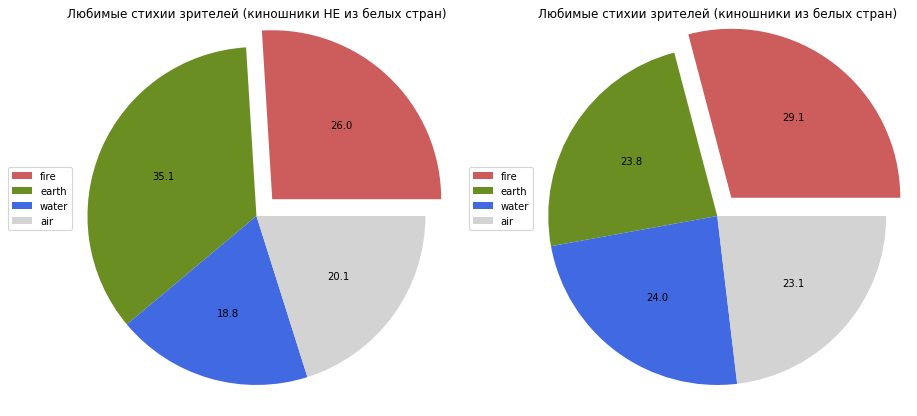

In [20]:
lft_tmp = df[(df['glob_region'] != 'USA') & (df['glob_region'] != 'CIS') & (df['glob_region'] != 'CoN') &\
            (df['glob_region'] != 'Europe')].groupby(by=['element'])['favors'].mean()
rgt_tmp = df[(df['glob_region'] == 'USA') | (df['glob_region'] == 'CIS') | (df['glob_region'] == 'CoN') |\
            (df['glob_region'] == 'Europe')].groupby(by=['element'])['favors'].mean()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True, suffixes=('_nw', '_w'))
rgt_tmp = df.groupby(by=['element'])['favors'].mean()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('favors', ascending=False)

data_names = [temp_df.index, temp_df.index]
data_values = [temp_df.favors_nw, temp_df.favors_w]
pie_name = ['Любимые стихии зрителей (киношники НЕ из белых стран)', \
            'Любимые стихии зрителей (киношники из белых стран)']
data_color = [list(map(mzl.elem_color.get, temp_df.index)), list(map(mzl.elem_color.get, temp_df.index))]
mzl.draw_pies(data_names, data_values, data_color=data_color, pies_names=pie_name)

#### Выводы и замечания:
1. Артистичные знаки огненной стихии лидируют и в этом блоке. 
2. Скорпионы редко идут в кино, но те что идут пользуются бешеной популярностью (мужчины-плохиши, девушки-оторвы?).
3. Деловитые и целеустремленные, но редкие в кино козероги тоже пользуются бешеной популярностью. Но лишь как герои-мужчины - женщины козероги (женщины-стервы?) никому не приятны.
4. Почему-то тоже самое можно сказать и про деву
5. Водные женщины более притягательны чем водные мужчины.
6. На статистику о распределении стихий НЕ из белых стран можно по-прежнему смотреть, но не воспринимать всерьез. (А со статистикой о распределении стихий из белых стран все в порядке.)

## Предпочитаемые профессии зодиаков

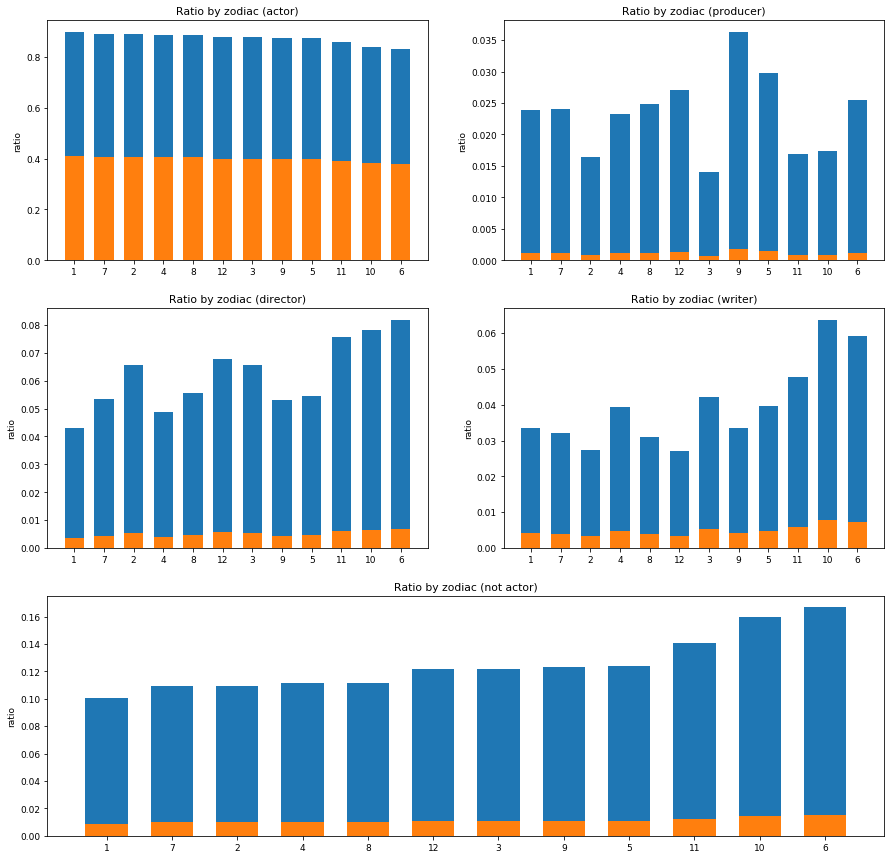

In [21]:
lft_tmp = df[df['prof'] == 'actr']['zodiac'].value_counts()
rgt_tmp = df[df['prof'] != 'actr']['zodiac'].value_counts()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df['zodiac'].value_counts()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df[df['prof'] == 'drct']['zodiac'].value_counts()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df[df['prof'] == 'wrtr']['zodiac'].value_counts()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df[df['prof'] == 'prod']['zodiac'].value_counts()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df.columns = ['actr', 'not_actr', 'total', 'drct', 'wrtr', 'prod']
temp_df['actr'] = temp_df['actr'] / temp_df['total']
temp_df['not_actr'] = temp_df['not_actr'] / temp_df['total']
temp_df['drct'] = temp_df['drct'] / temp_df['total']
temp_df['wrtr'] = temp_df['wrtr'] / temp_df['total']
temp_df['prod'] = temp_df['prod'] / temp_df['total']
temp_df['f_actr'] = (df[df.male == 0]['prof'].value_counts()['actr']/
                     df['prof'].value_counts()['actr']) * temp_df['actr']
temp_df['f_not_actr'] = (df[df.male == 0]['prof'].value_counts()[['drct','wrtr','prod']].sum()/
                     df['prof'].value_counts()[['drct','wrtr','prod']].sum()) * temp_df['not_actr']
temp_df['f_drct'] = (df[df.male == 0]['prof'].value_counts()['drct'] /
                     df['prof'].value_counts()['drct']) * temp_df['drct']
temp_df['f_wrtr'] = (df[df.male == 0]['prof'].value_counts()['wrtr'] / 
                     df['prof'].value_counts()['wrtr']) * temp_df['wrtr']
temp_df['f_prod'] = (df[df.male == 0]['prof'].value_counts()['prod'] / 
                     df['prof'].value_counts()['prod']) * temp_df['prod']
temp_df = temp_df.sort_values('actr', ascending=False)

fig = plt.figure(figsize= (15,15))
ax1 = fig.add_subplot(321) 
ax2 = fig.add_subplot(322) 
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(313)
width = 0.65
ind = list(map(mzl.zod_code.get, temp_df.index))

means = temp_df['actr'].values
ax1.bar(ind, means, width)
means = temp_df['f_actr'].values
ax1.bar(ind, means, width)
ax1.set_ylabel('ratio')
ax1.set_title('Ratio by zodiac (actor)')

means = temp_df['prod'].values
ax2.bar(ind, means, width)
means = temp_df['f_prod'].values
ax2.bar(ind, means, width)
ax2.set_ylabel('ratio')
ax2.set_title('Ratio by zodiac (producer)')

means = temp_df['drct'].values
ax3.bar(ind, means, width)
means = temp_df['f_drct'].values
ax3.bar(ind, means, width)
ax3.set_ylabel('ratio')
ax3.set_title('Ratio by zodiac (director)')

means = temp_df['wrtr'].values
ax4.bar(ind, means, width)
means = temp_df['f_wrtr'].values
ax4.bar(ind, means, width)
ax4.set_ylabel('ratio')
ax4.set_title('Ratio by zodiac (writer)')

means = temp_df['not_actr'].values
ax5.bar(ind, means, width)
means = temp_df['f_not_actr'].values
ax5.bar(ind, means, width)
ax5.set_ylabel('ratio')
ax5.set_title('Ratio by zodiac (not actor)')

plt.show()

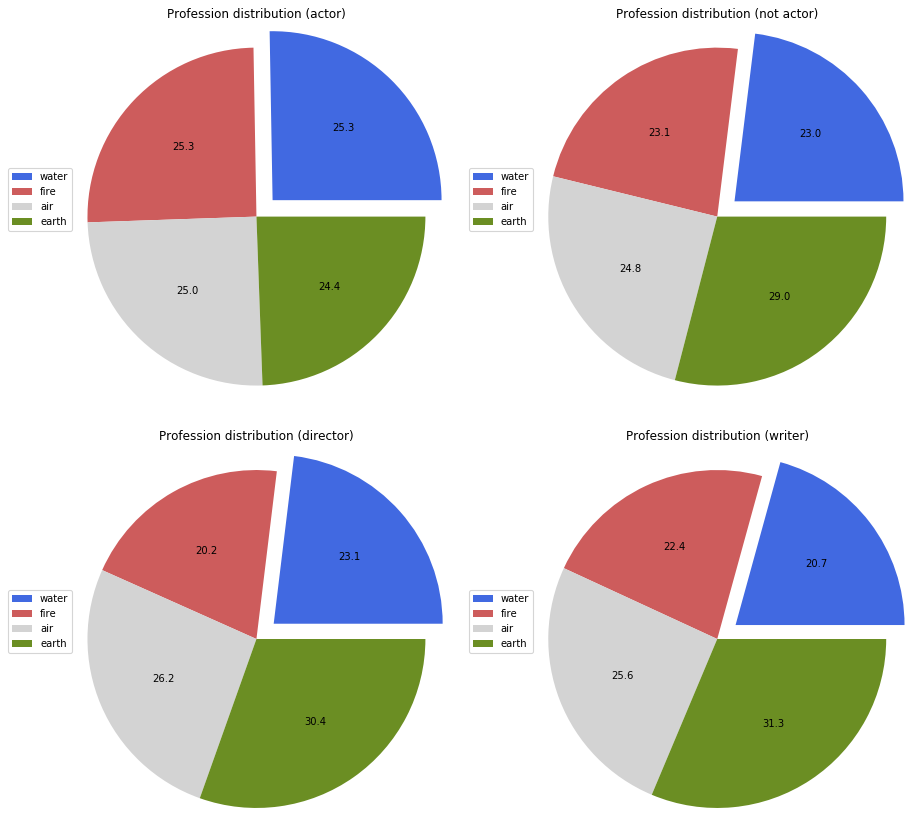

In [22]:
lft_tmp = df[df['prof'] == 'actr']['element'].value_counts()
rgt_tmp = df[df['prof'] != 'actr']['element'].value_counts()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df['element'].value_counts()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df[df['prof'] == 'drct']['element'].value_counts()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df[df['prof'] == 'wrtr']['element'].value_counts()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df[df['prof'] == 'prod']['element'].value_counts()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df.columns = ['actr', 'not_actr', 'total', 'drct', 'wrtr', 'prod']
temp_df['actr'] = temp_df['actr'] / temp_df['total']
temp_df['not_actr'] = temp_df['not_actr'] / temp_df['total']
temp_df['drct'] = temp_df['drct'] / temp_df['total']
temp_df['wrtr'] = temp_df['wrtr'] / temp_df['total']
temp_df['prod'] = temp_df['prod'] / temp_df['total']
temp_df['f_actr'] = (df[df.male == 0]['prof'].value_counts()['actr']/
                     df['prof'].value_counts()['actr']) * temp_df['actr']
temp_df['f_not_actr'] = (df[df.male == 0]['prof'].value_counts()[['drct','wrtr','prod']].sum()/
                     df['prof'].value_counts()[['drct','wrtr','prod']].sum()) * temp_df['not_actr']
temp_df['f_drct'] = (df[df.male == 0]['prof'].value_counts()['drct'] /
                     df['prof'].value_counts()['drct']) * temp_df['drct']
temp_df['f_wrtr'] = (df[df.male == 0]['prof'].value_counts()['wrtr'] / 
                     df['prof'].value_counts()['wrtr']) * temp_df['wrtr']
temp_df['f_prod'] = (df[df.male == 0]['prof'].value_counts()['prod'] / 
                     df['prof'].value_counts()['prod']) * temp_df['prod']
temp_df = temp_df.sort_values('actr', ascending=False)

profs = list(temp_df.index)
pies = ['actor', 'not actor', 'director', 'writer']
pies_names = []
data_names = []
data_color = []
for p in pies:
    pies_names.append('Profession distribution ({})'.format(p))
    data_names.append(profs)
    data_color.append( list(map(mzl.elem_color.get, profs)))
data_values = [temp_df.actr*100, temp_df.not_actr*100, temp_df.drct*100, temp_df.wrtr*100]
mzl.draw_pies(data_names, data_values, pies_names=pies_names, data_color=data_color)

#### Выводы и замечания:
1. Девы и козероги более склонны к тому чтобы заниматься работой режисера, сценариста или продюсера, а не работой актера. Возможно. Разница очень маленькая. Требуется применить статистический критерий.
2. Зодиаки земли более склонны к организаторской и немного механической работе режисера, сценариста и продюсера. А эмоциональные зодиаки воды эту работу не любят. Требуется применить статистический критерий.
3. Данных для всех профессий по отдельности (кроме профессии актера) очень мало. Единственные графики на которые можно обращать внимание - графики актеров и, быть может, не-актеров.

## Среднее количество фильмов за карьеру

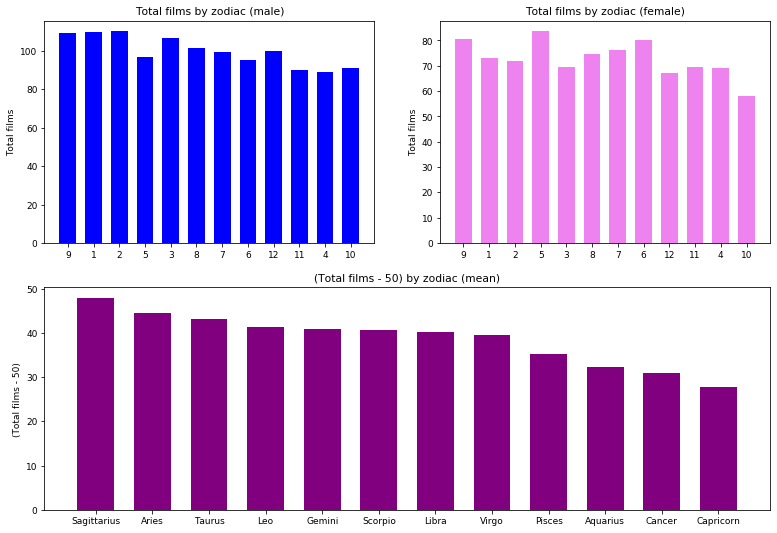

In [23]:
lft_tmp = df[df['male'] == 0].groupby(by=['zodiac'])['total_films'].mean()
rgt_tmp = df[df['male'] == 1].groupby(by=['zodiac'])['total_films'].mean()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df.groupby(by=['zodiac'])['total_films'].mean()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('total_films', ascending=False)

fig = plt.figure(figsize= (13,9))
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222) 
ax3 = fig.add_subplot(212)
width = 0.65

ind = list(map(mzl.zod_code.get, temp_df.index))
means = temp_df['total_films_y'].values
ax1.bar(ind, means, width, color='b')
ax1.set_ylabel('Total films')
ax1.set_title('Total films by zodiac (male)')

ind = list(map(mzl.zod_code.get, temp_df.index))
means = temp_df['total_films_x'].values
ax2.bar(ind, means, width, color='violet')
ax2.set_ylabel('Total films')
ax2.set_title('Total films by zodiac (female)')

ind = temp_df['total_films'].index
means = temp_df['total_films'].values - 50
ax3.bar(ind, means, width, color='purple')
ax3.set_ylabel('(Total films - 50)')
ax3.set_title('(Total films - 50) by zodiac (mean)')
# ax3.set_yticks(np.arange(0, 10, 5))

plt.show()

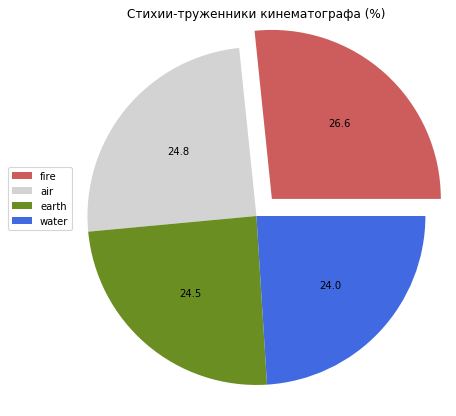

In [24]:
lft_tmp = df[df['male'] == 0].groupby(by=['element'])['total_films'].mean()
rgt_tmp = df[df['male'] == 1].groupby(by=['element'])['total_films'].mean()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df.groupby(by=['element'])['total_films'].mean()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('total_films', ascending=False)

pies_names = ['Стихии-труженники кинематографа (%)'.format(p)]
data_names = [temp_df.index]
data_color = [map(mzl.elem_color.get, temp_df.index)]
data_values = [temp_df.total_films]
mzl.draw_pies(data_names, data_values, pies_names=pies_names, data_color=data_color)

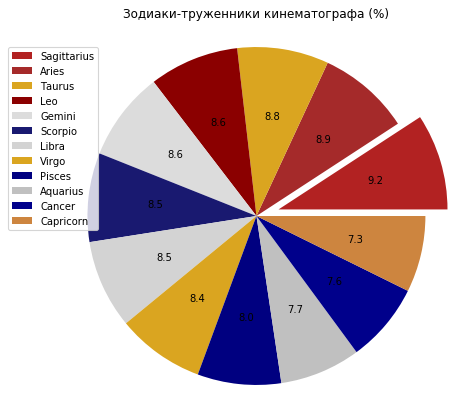

In [25]:
lft_tmp = df[df['male'] == 0].groupby(by=['zodiac'])['total_films'].mean()
rgt_tmp = df[df['male'] == 1].groupby(by=['zodiac'])['total_films'].mean()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df.groupby(by=['zodiac'])['total_films'].mean()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('total_films', ascending=False)

pies_names = ['Зодиаки-труженники кинематографа (%)'.format(p)]
data_names = [temp_df.index]
data_color = [map(mzl.zod_color.get, temp_df.index)]
data_values = [temp_df.total_films]
mzl.draw_pies(data_names, data_values, pies_names=pies_names, data_color=data_color)

#### Выводы и замечания: 
1. Тельцы, внезапно, решили брать количеством, а не качеством.
2. Львы ленивые, львицы тщеславные.
3. Огненные знаки любят светиться на экране чаще других.
4. Козероги не любят светиться.

## Награды знаков зодиака

### Любая награда

#### Вероятность получить любую награду у зодиака

Вероятность = (число наград зодиака / число актеров в зодиаке). 
Любая награда может означать как Оскар, так и Золотую малину.

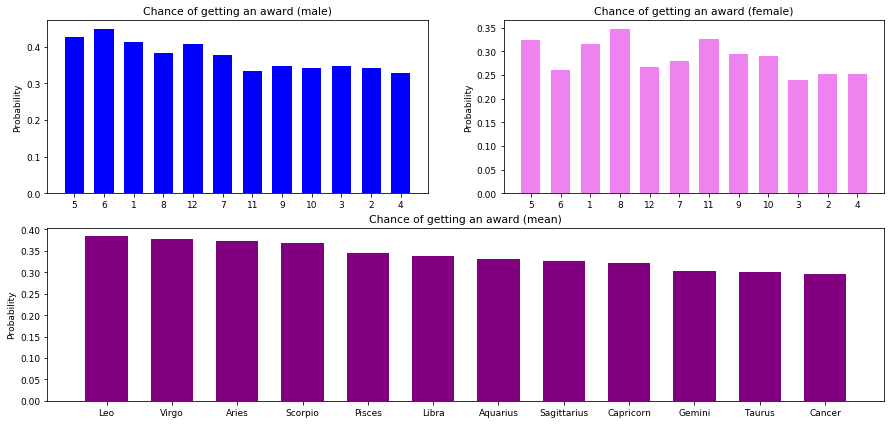

In [67]:
df.awards = df.awards.astype(int)
lft_tmp = df[df['male'] == 0].groupby(by=['zodiac'])['awards'].mean()
rgt_tmp = df[df['male'] == 1].groupby(by=['zodiac'])['awards'].mean()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df.groupby(by=['zodiac'])['awards'].mean()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('awards', ascending=False)

fig = plt.figure(figsize= (15,7))
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222) 
ax3 = fig.add_subplot(212)
width = 0.65

ind = list(map(mzl.zod_code.get, temp_df.index))
means = temp_df['awards_y'].values
ax1.bar(ind, means, width, color='b')
ax1.set_ylabel('Probability')
ax1.set_title('Chance of getting an award (male)')

ind = list(map(mzl.zod_code.get, temp_df.index))
means = temp_df['awards_x'].values
ax2.bar(ind, means, width, color='violet')
ax2.set_ylabel('Probability')
ax2.set_title('Chance of getting an award (female)')

ind = temp_df['awards'].index
means = temp_df['awards'].values
ax3.bar(ind, means, width, color='purple')
ax3.set_ylabel('Probability')
ax3.set_title('Chance of getting an award (mean)')

plt.show()

#### Абсолютное число наград на зодиак

Абсолютное число наград на зодиак = число наград зодиака. Отличается от предыдущей метрики отсутствием нормировки.

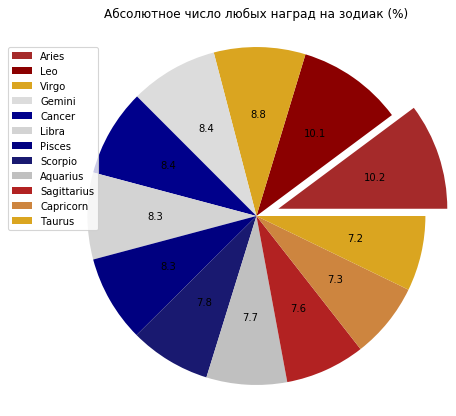

In [79]:
lft_tmp = df[df['male'] == 0].groupby(by=['zodiac'])['awards'].sum()
rgt_tmp = df[df['male'] == 1].groupby(by=['zodiac'])['awards'].sum()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df.groupby(by=['zodiac'])['awards'].sum()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('awards', ascending=False)

pies_names = ['Абсолютное число любых наград на зодиак (%)'.format(p)]
data_names = [temp_df.index]
data_color = [map(mzl.zod_color.get, temp_df.index)]
data_values = [temp_df.awards]
mzl.draw_pies(data_names, data_values, pies_names=pies_names, data_color=data_color)

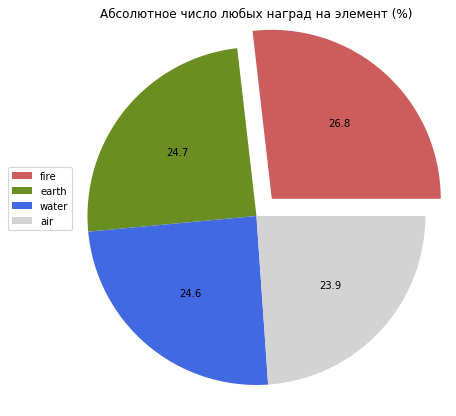

In [80]:
lft_tmp = df[df['male'] == 0].groupby(by=['element'])['awards'].mean()
rgt_tmp = df[df['male'] == 1].groupby(by=['element'])['awards'].mean()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df.groupby(by=['element'])['awards'].mean()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('awards', ascending=False)

pies_names = ['Абсолютное число любых наград на элемент (%)'.format(p)]
data_names = [temp_df.index]
data_color = [map(mzl.elem_color.get, temp_df.index)]
data_values = [temp_df.awards]
mzl.draw_pies(data_names, data_values, pies_names=pies_names, data_color=data_color)

### Оскар

#### Вероятность получить Оскар у зодиака

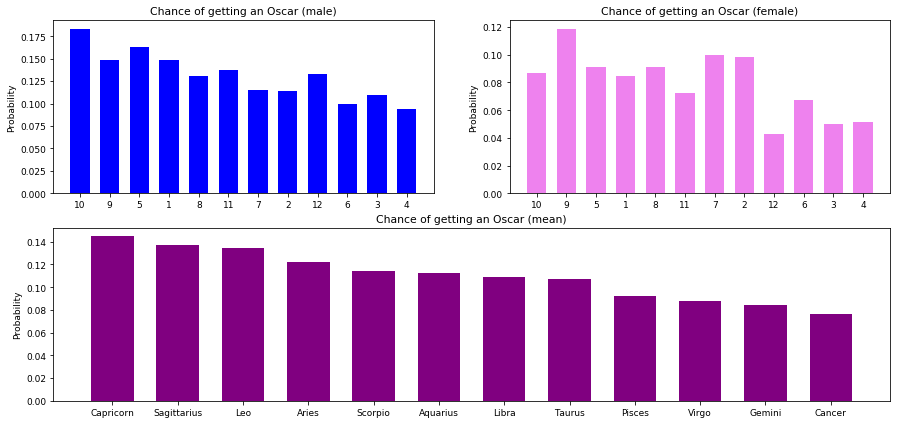

In [81]:
lft_tmp = df[df['male'] == 0].groupby(by=['zodiac'])['oscar'].mean()
rgt_tmp = df[df['male'] == 1].groupby(by=['zodiac'])['oscar'].mean()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df.groupby(by=['zodiac'])['oscar'].mean()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('oscar', ascending=False)

fig = plt.figure(figsize= (15,7))
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222) 
ax3 = fig.add_subplot(212)
width = 0.65

ind = list(map(mzl.zod_code.get, temp_df.index))
means = temp_df['oscar_y'].values
ax1.bar(ind, means, width, color='b')
ax1.set_ylabel('Probability')
ax1.set_title('Chance of getting an Oscar (male)')

ind = list(map(mzl.zod_code.get, temp_df.index))
means = temp_df['oscar_x'].values
ax2.bar(ind, means, width, color='violet')
ax2.set_ylabel('Probability')
ax2.set_title('Chance of getting an Oscar (female)')

ind = temp_df['oscar'].index
means = temp_df['oscar'].values
ax3.bar(ind, means, width, color='purple')
ax3.set_ylabel('Probability')
ax3.set_title('Chance of getting an Oscar (mean)')

plt.show()

#### Абсолютное число Оскаров на зодиак

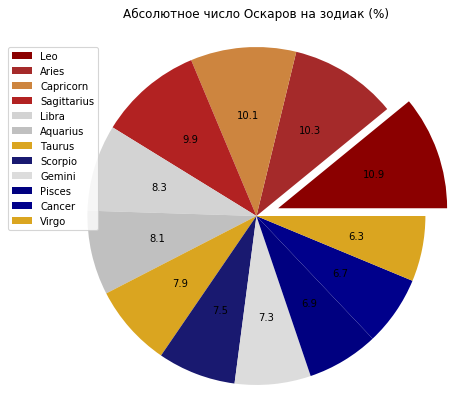

In [82]:
lft_tmp = df[df['male'] == 0].groupby(by=['zodiac'])['oscar'].sum()
rgt_tmp = df[df['male'] == 1].groupby(by=['zodiac'])['oscar'].sum()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df.groupby(by=['zodiac'])['oscar'].sum()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('oscar', ascending=False)

pies_names = ['Абсолютное число Оскаров на зодиак (%)'.format(p)]
data_names = [temp_df.index]
data_color = [map(mzl.zod_color.get, temp_df.index)]
data_values = [temp_df.oscar]
mzl.draw_pies(data_names, data_values, pies_names=pies_names, data_color=data_color)

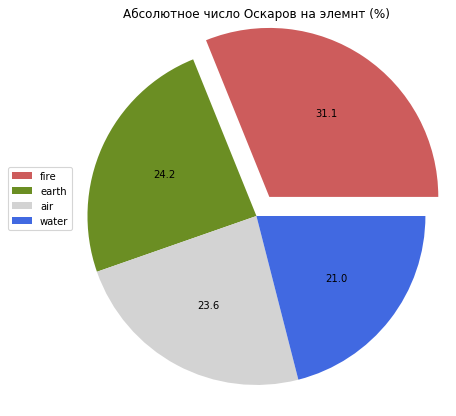

In [85]:
lft_tmp = df[df['male'] == 0].groupby(by=['element'])['oscar'].sum()
rgt_tmp = df[df['male'] == 1].groupby(by=['element'])['oscar'].sum()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df.groupby(by=['element'])['oscar'].sum()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('oscar', ascending=False)

pies_names = ['Абсолютное число Оскаров на элемнт (%)'.format(p)]
data_names = [temp_df.index]
data_color = [map(mzl.elem_color.get, temp_df.index)]
data_values = [temp_df.oscar]
mzl.draw_pies(data_names, data_values, pies_names=pies_names, data_color=data_color)

### Топ неудачников

#### Вероятность стать неудачником

Неудачник = был номинирован, но никогда не получал Оскар.

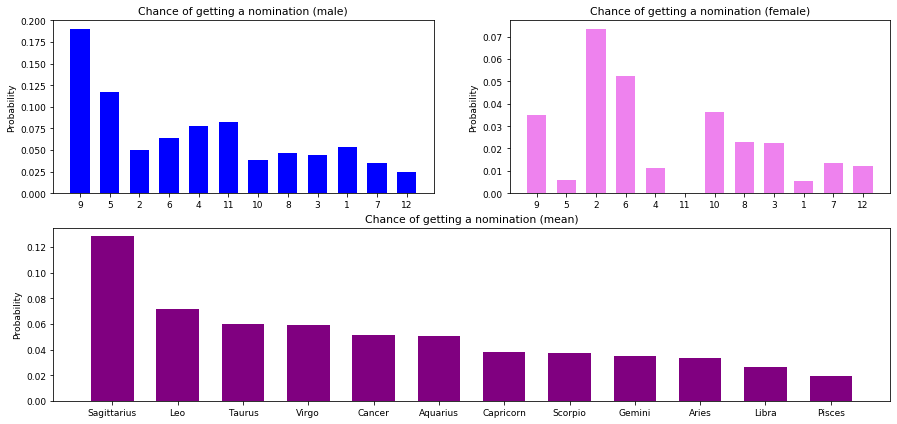

In [86]:
lft_tmp = df[df['male'] == 0].groupby(by=['zodiac'])['nom_oscar'].mean()
rgt_tmp = df[df['male'] == 1].groupby(by=['zodiac'])['nom_oscar'].mean()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df.groupby(by=['zodiac'])['nom_oscar'].mean()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('nom_oscar', ascending=False)

fig = plt.figure(figsize= (15,7))
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222) 
ax3 = fig.add_subplot(212)
width = 0.65

ind = list(map(mzl.zod_code.get, temp_df.index))
means = temp_df['nom_oscar_y'].values
ax1.bar(ind, means, width, color='b')
ax1.set_ylabel('Probability')
ax1.set_title('Chance of getting a nomination (male)')

ind = list(map(mzl.zod_code.get, temp_df.index))
means = temp_df['nom_oscar_x'].values
ax2.bar(ind, means, width, color='violet')
ax2.set_ylabel('Probability')
ax2.set_title('Chance of getting a nomination (female)')

ind = temp_df['nom_oscar'].index
means = temp_df['nom_oscar'].values
ax3.bar(ind, means, width, color='purple')
ax3.set_ylabel('Probability')
ax3.set_title('Chance of getting a nomination (mean)')

plt.show()

#### Абсолютное число неудачников

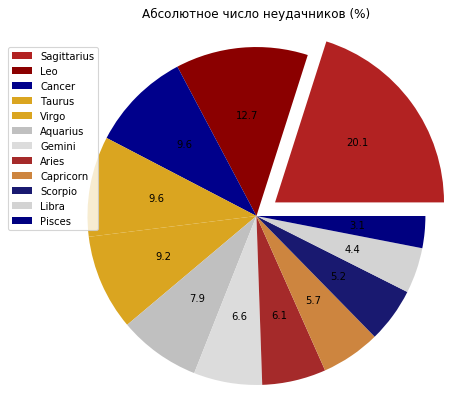

In [110]:
lft_tmp = df[df['male'] == 0].groupby(by=['zodiac'])['nom_oscar'].sum()
rgt_tmp = df[df['male'] == 1].groupby(by=['zodiac'])['nom_oscar'].sum()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df.groupby(by=['zodiac'])['nom_oscar'].sum()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('nom_oscar', ascending=False)

pies_names = ['Абсолютное число неудачников (%)'.format(p)]
data_names = [temp_df.index]
data_color = [map(mzl.zod_color.get, temp_df.index)]
data_values = [temp_df.nom_oscar]
mzl.draw_pies(data_names, data_values, pies_names=pies_names, data_color=data_color)

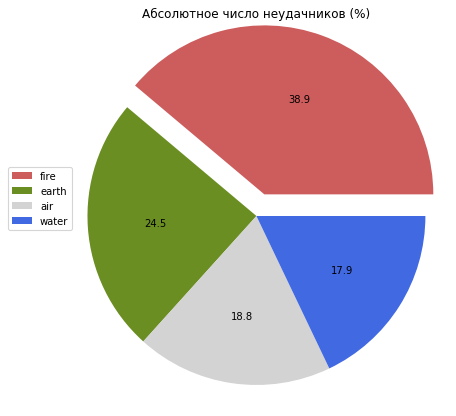

In [111]:
lft_tmp = df[df['male'] == 0].groupby(by=['element'])['nom_oscar'].sum()
rgt_tmp = df[df['male'] == 1].groupby(by=['element'])['nom_oscar'].sum()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df.groupby(by=['element'])['nom_oscar'].sum()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('nom_oscar', ascending=False)

pies_names = ['Абсолютное число неудачников (%)'.format(p)]
data_names = [temp_df.index]
data_color = [map(mzl.elem_color.get, temp_df.index)]
data_values = [temp_df.nom_oscar]
mzl.draw_pies(data_names, data_values, pies_names=pies_names, data_color=data_color)

### Топ получивших Оскар или хотя бы номинированных на Оскар

#### Вероятность словить хайп

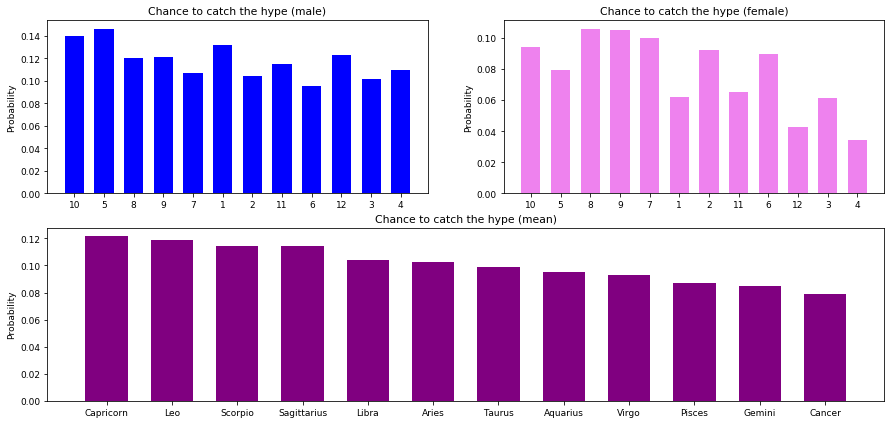

In [108]:
df['have_oscar_or_nom_oscar'] = (df['nom_oscar'] + df['oscar']).astype(bool).astype(int)

lft_tmp = df[df['male'] == 0].groupby(by=['zodiac'])['have_oscar_or_nom_oscar'].mean()
rgt_tmp = df[df['male'] == 1].groupby(by=['zodiac'])['have_oscar_or_nom_oscar'].mean()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df.groupby(by=['zodiac'])['have_oscar_or_nom_oscar'].mean()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('have_oscar_or_nom_oscar', ascending=False)

fig = plt.figure(figsize= (15,7))
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222) 
ax3 = fig.add_subplot(212)
width = 0.65

ind = list(map(mzl.zod_code.get, temp_df.index))
means = temp_df['have_oscar_or_nom_oscar_y'].values
ax1.bar(ind, means, width, color='b')
ax1.set_ylabel('Probability')
ax1.set_title('Chance to catch the hype (male)')

ind = list(map(mzl.zod_code.get, temp_df.index))
means = temp_df['have_oscar_or_nom_oscar_x'].values
ax2.bar(ind, means, width, color='violet')
ax2.set_ylabel('Probability')
ax2.set_title('Chance to catch the hype (female)')

ind = temp_df['have_oscar_or_nom_oscar'].index
means = temp_df['have_oscar_or_nom_oscar'].values
ax3.bar(ind, means, width, color='purple')
ax3.set_ylabel('Probability')
ax3.set_title('Chance to catch the hype (mean)')

plt.show()

#### Абсолютное число хайпанувших

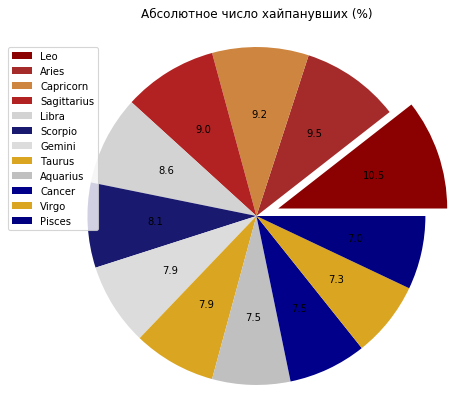

In [113]:
lft_tmp = df[df['male'] == 0].groupby(by=['zodiac'])['have_oscar_or_nom_oscar'].sum()
rgt_tmp = df[df['male'] == 1].groupby(by=['zodiac'])['have_oscar_or_nom_oscar'].sum()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df.groupby(by=['zodiac'])['have_oscar_or_nom_oscar'].sum()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('have_oscar_or_nom_oscar', ascending=False)

pies_names = ['Абсолютное число хайпанувших (%)'.format(p)]
data_names = [temp_df.index]
data_color = [map(mzl.zod_color.get, temp_df.index)]
data_values = [temp_df.have_oscar_or_nom_oscar]
mzl.draw_pies(data_names, data_values, pies_names=pies_names, data_color=data_color)

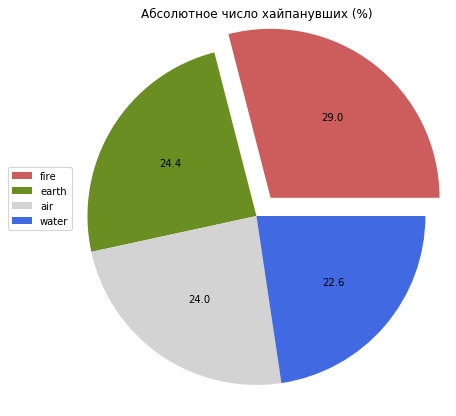

In [114]:
lft_tmp = df[df['male'] == 0].groupby(by=['element'])['have_oscar_or_nom_oscar'].sum()
rgt_tmp = df[df['male'] == 1].groupby(by=['element'])['have_oscar_or_nom_oscar'].sum()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df.groupby(by=['element'])['have_oscar_or_nom_oscar'].sum()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('have_oscar_or_nom_oscar', ascending=False)

pies_names = ['Абсолютное число хайпанувших (%)'.format(p)]
data_names = [temp_df.index]
data_color = [map(mzl.elem_color.get, temp_df.index)]
data_values = [temp_df.have_oscar_or_nom_oscar]
mzl.draw_pies(data_names, data_values, pies_names=pies_names, data_color=data_color)

#### Выводы и замечания:
1. Львы чаще других получают награды.
2. Деловитые и целеустремленные козероги идут наравне со львами по общему количеству наград. Но вероятность получить Оскар (а не какую-то другую попсовую награду или даже просто наминацию на Оскар) у них выше всего. При этом, они реже всех (наравне со скорпионом) идут работать в киноиндустрию. 

## Рейтинг

Средний рейтинг фильмов, в которых киношники учавствовали.

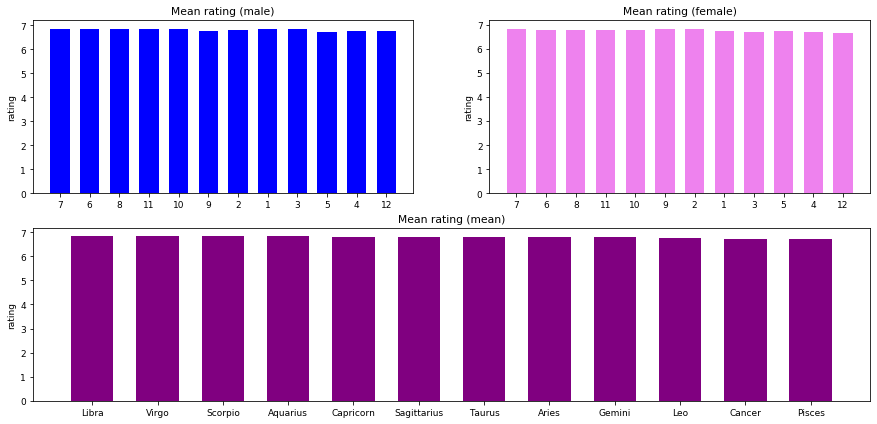

In [115]:
lft_tmp = df[df['male'] == 0].groupby(by=['zodiac'])['rating'].mean()
rgt_tmp = df[df['male'] == 1].groupby(by=['zodiac'])['rating'].mean()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df.groupby(by=['zodiac'])['rating'].mean()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('rating', ascending=False)

fig = plt.figure(figsize= (15,7))
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222) 
ax3 = fig.add_subplot(212)
width = 0.65

ind = list(map(mzl.zod_code.get, temp_df.index))
means = temp_df['rating_y'].values
ax1.bar(ind, means, width, color='b')
ax1.set_ylabel('rating')
ax1.set_title('Mean rating (male)')

ind = list(map(mzl.zod_code.get, temp_df.index))
means = temp_df['rating_x'].values
ax2.bar(ind, means, width, color='violet')
ax2.set_ylabel('rating')
ax2.set_title('Mean rating (female)')

ind = temp_df['rating'].index
means = temp_df['rating'].values
ax3.bar(ind, means, width, color='purple')
ax3.set_ylabel('rating')
ax3.set_title('Mean rating (mean)')

plt.show()

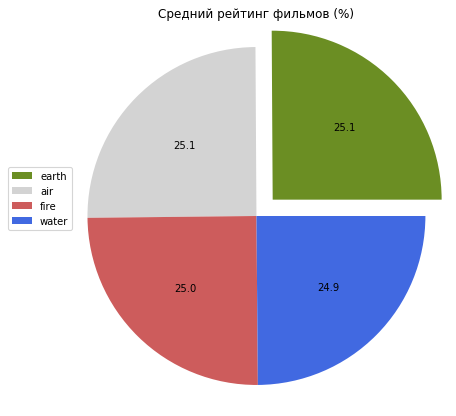

In [116]:
lft_tmp = df[df['male'] == 0].groupby(by=['element'])['rating'].mean()
rgt_tmp = df[df['male'] == 1].groupby(by=['element'])['rating'].mean()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df.groupby(by=['element'])['rating'].mean()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('rating', ascending=False)

pies_names = ['Средний рейтинг фильмов (%)'.format(p)]
data_names = [temp_df.index]
data_color = [map(mzl.elem_color.get, temp_df.index)]
data_values = [temp_df.rating]
mzl.draw_pies(data_names, data_values, pies_names=pies_names, data_color=data_color)

Ни на что не влияет.

## Добавление в закладки

Анализируются число добавления человека в любую папку (избранное, актеры, режиссеры, любимые звезды, что-то свое...), а не только в папку "избранное" как было в блоке сверху.

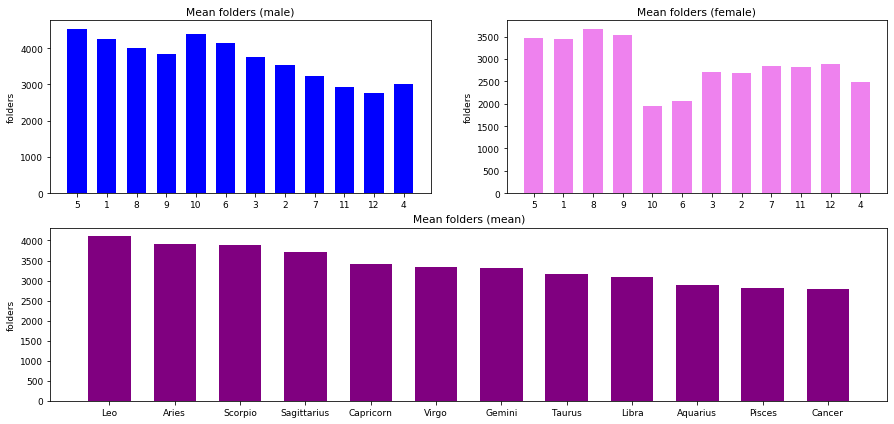

In [117]:
df['folders'] = df['folders'].astype(float)

lft_tmp = df[df['male'] == 0].groupby(by=['zodiac'])['folders'].mean()
rgt_tmp = df[df['male'] == 1].groupby(by=['zodiac'])['folders'].mean()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df.groupby(by=['zodiac'])['folders'].mean()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('folders', ascending=False)

fig = plt.figure(figsize= (15,7))
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222) 
ax3 = fig.add_subplot(212)
width = 0.65

ind = list(map(mzl.zod_code.get, temp_df.index))
means = temp_df['folders_y'].values
ax1.bar(ind, means, width, color='b')
ax1.set_ylabel('folders')
ax1.set_title('Mean folders (male)')

ind = list(map(mzl.zod_code.get, temp_df.index))
means = temp_df['folders_x'].values
ax2.bar(ind, means, width, color='violet')
ax2.set_ylabel('folders')
ax2.set_title('Mean folders (female)')

ind = temp_df['folders'].index
means = temp_df['folders'].values
ax3.bar(ind, means, width, color='purple')
ax3.set_ylabel('folders')
ax3.set_title('Mean folders (mean)')

plt.show()

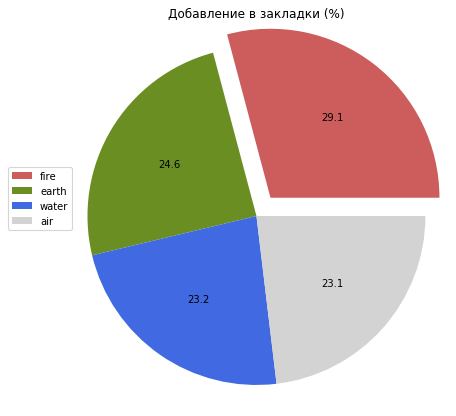

In [118]:
lft_tmp = df[df['male'] == 0].groupby(by=['element'])['folders'].mean()
rgt_tmp = df[df['male'] == 1].groupby(by=['element'])['folders'].mean()
temp_df = pd.merge(lft_tmp,rgt_tmp, left_index=True, right_index=True)
rgt_tmp = df.groupby(by=['element'])['folders'].mean()
temp_df = pd.merge(temp_df,rgt_tmp, left_index=True, right_index=True)
temp_df = temp_df.sort_values('folders', ascending=False)

pies_names = ['Добавление в закладки (%)'.format(p)]
data_names = [temp_df.index]
data_color = [map(mzl.elem_color.get, temp_df.index)]
data_values = [temp_df.folders]
mzl.draw_pies(data_names, data_values, pies_names=pies_names, data_color=data_color)

#### Выводы и замечания:
1. Львы как всегда самые классные.